<a href="https://colab.research.google.com/github/danpanetta/data_science/blob/master/Analyzing_Airbnb_Data_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb Data - Amsterdam

Airbnb, Inc. is an **online marketplace company** that connects people who want to rent their homes or rooms with those looking for accommodation in that location.

Founded in 2008, the startup had 200 million active listings in 100,000 cities in more than 220 countries and regions and had already **accommodated** more than **800 million people** by September 30, 2020.

(etc)

<center><img alt="Analisando Airbnb" width="50%" src="https://assets.entrepreneur.com/article/1405623476-airbnb-logo-explanation.jpg"></center>


## Obtenção dos dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Dublin (good for visualisations) (27-01-2020).*

In [ ]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# load csv file
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2020-01-27/visualisations/listings.csv')

# check the dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14842,Portobello Gem. Entire house. Can sleep 3.,58344,Hilary,NaN,Dublin City,53.33106,-6.26916,Entire home/apt,93,2,44,2020-01-03,0.42,1,2
1,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,222,2020-01-12,2.06,3,267
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.11,1,86
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,175,2020-01-17,1.66,3,269
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.05,3,142


## Data Analysis

Esta etapa tem por objetivo criar uma consciêcia situacional inicial e permitir um entendimento de como os dados estão estruturados.



**Dicionário de variáveis**
- id



In [ ]:
# número de entradas e de variáveis
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

#print('\n')
# tipo de variáveis
df.dtypes

Entradas:	 9250
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# ordenar as variáveis em ordem decrescente por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.157946
last_review                       0.157946
name                              0.000108
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

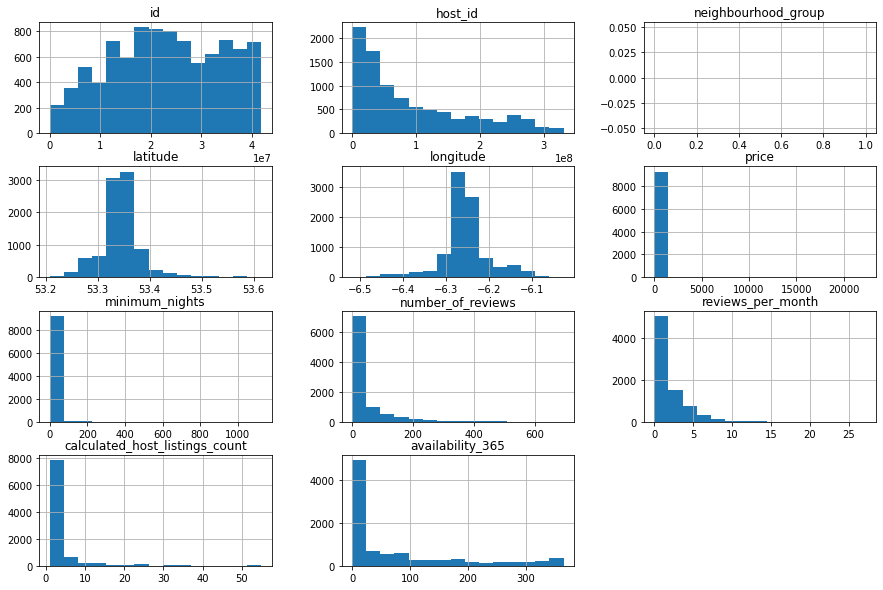

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

## Q4. Há outliers presentes?

Pela distribuição do histograma ...


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9250.000000,9250.000000,9250.000000,7789.000000,9250.000000,9250.000000
mean,132.282162,4.173946,37.965081,1.784230,3.376865,74.436108
std,344.439298,20.797031,66.073705,2.077663,6.358962,106.492385
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,2.000000,0.290000,1.000000,0.000000
50%,85.000000,2.000000,10.000000,1.000000,1.000000,14.000000
75%,147.750000,3.000000,43.000000,2.600000,3.000000,115.000000
max,22337.000000,1125.000000,695.000000,27.160000,55.000000,365.000000


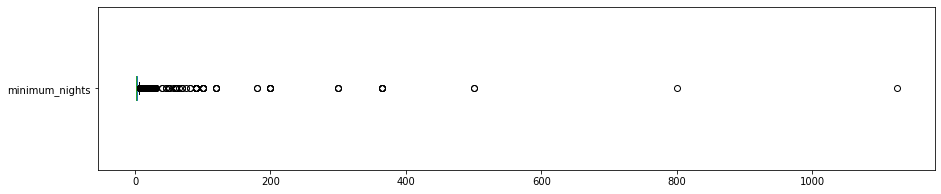

minimun_nights - valores acima de 30:
75 entradas
0.8108%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimun_nights - valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

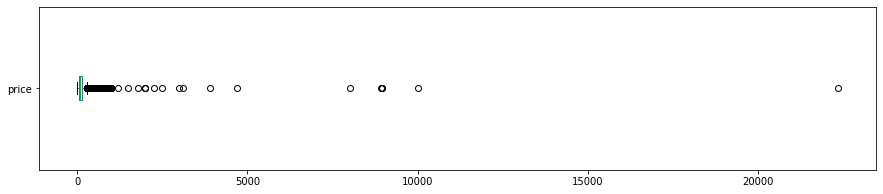


price: valores acima de 300
538 entradas
5.8162%


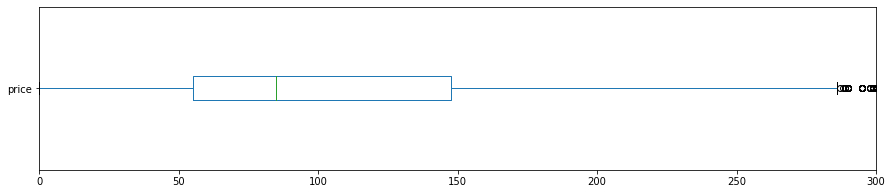

In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 300 para price
print('\nprice: valores acima de 300')
print('{} entradas'.format(len(df[df.price > 300])))
print('{:.4f}%'.format((len(df[df.price > 300]) / df.shape[0]) * 100))

df.price.plot(kind='box', vert=False, xlim=(0, 300), figsize=(15, 3));

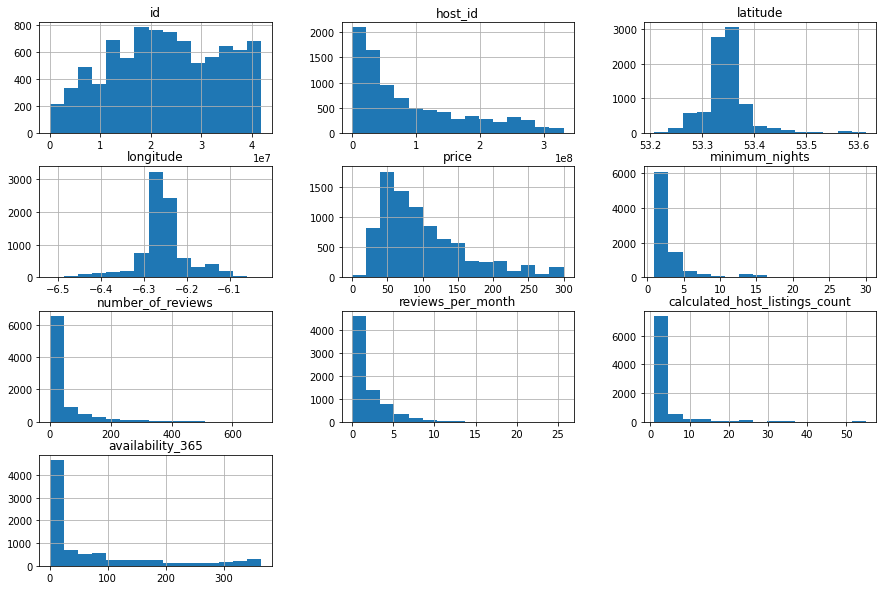

In [ ]:
# removendo outliers em um DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));



In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.086939,-0.041415,-0.066925,0.119487,0.051062
minimum_nights,0.086939,1.000000,-0.060142,-0.096093,0.046455,0.044064
number_of_reviews,-0.041415,-0.060142,1.000000,0.724007,0.033200,0.166058
reviews_per_month,-0.066925,-0.096093,0.724007,1.000000,0.077725,0.194672
calculated_host_listings_count,0.119487,0.046455,0.033200,0.077725,1.000000,0.204023
availability_365,0.051062,0.044064,0.166058,0.194672,0.204023,1.000000


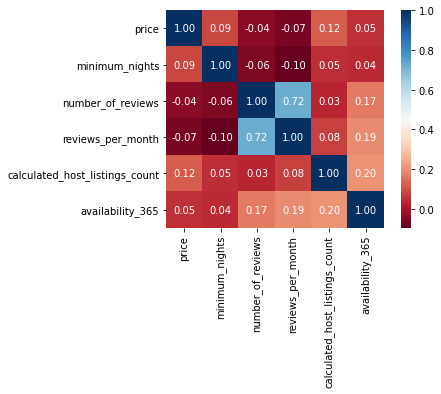

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Q5 Qual o tipo de móvel mais alugado no Airbnb

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       4367
Entire home/apt    4053
Shared room         147
Hotel room           79
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.505089
Entire home/apt    0.468772
Shared room        0.017002
Hotel room         0.009137
Name: room_type, dtype: float64

Q6 Qual a localidade mais cara de Dublin?

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Dublin City              102.742730
Dn Laoghaire-Rathdown     98.972603
Fingal                    78.912935
South Dublin              71.791086
Name: price, dtype: float64

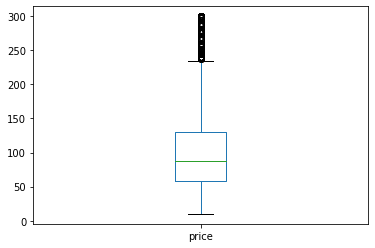

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Dublin City'].price.plot(kind='box');

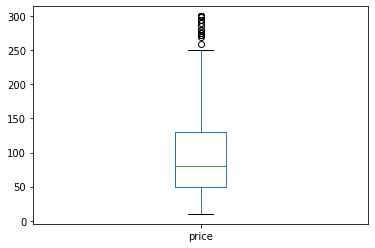

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Dn Laoghaire-Rathdown'].price.plot(kind='box');

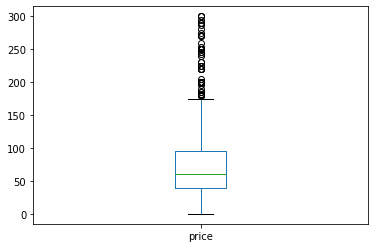

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Fingal'].price.plot(kind='box');

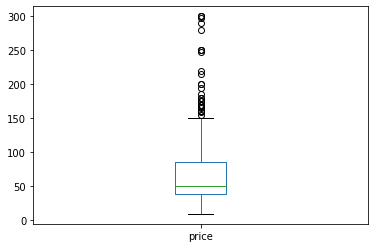

In [ ]:
df_clean[df_clean['neighbourhood'] == 'South Dublin'].price.plot(kind='box');

In [ ]:
# ver quantidade de imóveis em Dublin City
print(df_clean[df_clean.neighbourhood == "Dublin City"].shape)
print(df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"].shape)
print(df_clean[df_clean.neighbourhood == "Fingal"].shape)
print(df_clean[df_clean.neighbourhood == "South Dublin"].shape)

(6534, 15)
(949, 15)
(804, 15)
(359, 15)


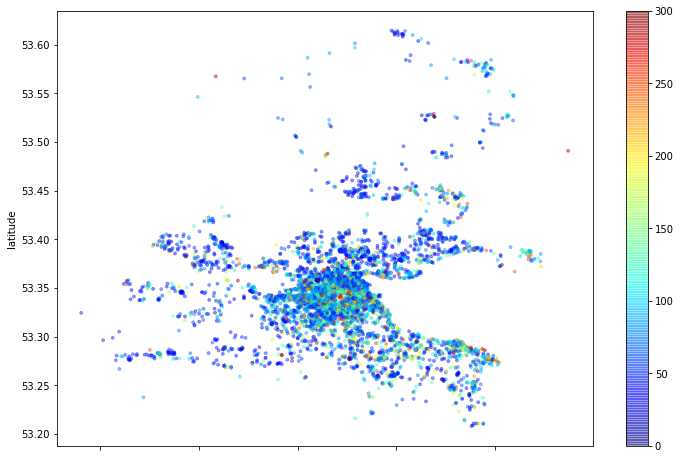

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

In [ ]:
# instalar wordcloud
!pip install wordcloud -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
DATA_PATH = "http://data.insideairbnb.com/ireland/leinster/dublin/2020-01-27/data/listings.csv.gz"

# importar o arquivo csv em um df
df = pd.read_csv(DATA_PATH)

df.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14842,https://www.airbnb.com/rooms/14842,20200127065510,2020-01-27,Portobello Gem. Entire house. Can sleep 3.,"Beautiful entire house, newly revamped, with s...","Gorgeous, newly revamped central Dublin city e...","Beautiful entire house, newly revamped, with s...",none,Portobello is an exceptional place to live - v...,NaN,"There is great public transport - buses, Luas,...",Guests get the whole house to themselves.,I love meeting guests and I give you extensive...,"This house is a charming space, just completel...",NaN,NaN,https://a0.muscache.com/im/pictures/106656330/...,NaN,58344,https://www.airbnb.com/users/show/58344,Hilary,2009-11-29,"Dublin, County Dublin, Ireland",An easy-going and friendly Irish woman. Works ...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/58344/profile...,https://a0.muscache.com/im/users/58344/profile...,NaN,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Dublin, Dublin City, Ireland",Portobello,Dublin City,...,$30.00,2,3,2,2,1125,1125,2.0,1125.0,a week ago,t,2,2,2,2,2020-01-27,44,2,2011-07-11,2020-01-03,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.42
1,44077,https://www.airbnb.com/rooms/44077,20200127065510,2020-01-27,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,60,3,3,60,60,3.0,60.0,2 weeks ago,t,14,25,53,267,2020-01-27,222,40,2011-03-20,2020-01-12,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.06
2,85148,https://www.airbnb.com/rooms/85148,20200127065510,2020-01-27,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none

In [ ]:
print("Quantidades de valores ausentes: {} de {}".format(df.summary.isnull().sum(), df.shape[0]) )

Quantidades de valores ausentes: 357 de 9250


In [ ]:
# drop na and select only summary column

summary = df.dropna(subset=['summary'], axis=0)['summary']
summary

0       Beautiful entire house, newly revamped, with s...
1       Our house was built in 1937 when there was ple...
3       Our Cottage is a charming light filled cottage...
4       Welcoming victorian house. Breakfast included....
5       washing can be done at a cost of five euro per...
                              ...                        
9245    Cozy, nice, quiet and clear bedroom, perfect f...
9246    Newly renovated, funky second floor flat locat...
9247    Spacious ensuite double room with private bath...
9248    A luminous and very spacious bedroom in the he...
9249    South facing, bright, modern and homely 2 bed ...
Name: summary, Length: 8893, dtype: object

In [ ]:
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}",format(len(all_summary)))

Quantidade de Palavras: {} 3022015


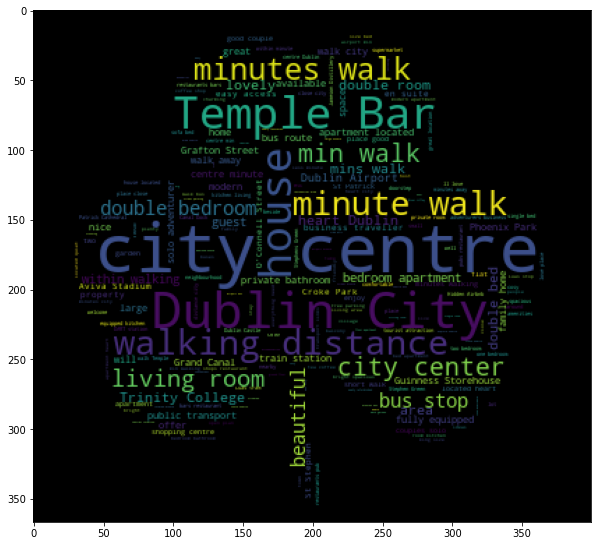

In [ ]:
import numpy as np
from PIL import Image

stopwords = set(STOPWORDS)

dublin_mask = np.array(Image.open("/content/shamrock.jpg"))

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      max_words=200,
                      max_font_size=200,
                      min_font_size=1,
                      mask=dublin_mask,
                      width=1600, height=1600).generate(all_summary)

image_colors = ImageColorGenerator(dublin_mask)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')

#plt.tight_layout()

#plt.show()
plt.imshow(wordcloud)

Conclusion